# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

13


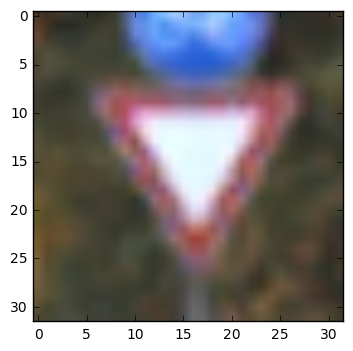

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from random import randint
%matplotlib inline
index = randint(0,n_train)
plt.imshow(X_train[index])
print(y_train[index])

In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_temp = np.concatenate((X_train, X_test))
y_temp = np.concatenate((y_train, y_test))
X_temp, y_temp = shuffle(X_temp, y_temp)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp[:45000], y_temp[:45000], test_size=0.33, random_state=42)
X_test = X_temp[45000:,:,:,:]
y_test = y_temp[45000:]
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(30150, 32, 32, 3)
(30150,)
(14850, 32, 32, 3)
(14850,)
(1839, 32, 32, 3)
(1839,)


In [9]:
def stat(data):
    label_count = {}
    for i in data:
        label_count[i] = label_count.get(i, 0)  + 1
    return label_count
train_stat = stat(y_train)
valid_stat = stat(y_valid)
test_stat = stat(y_test)

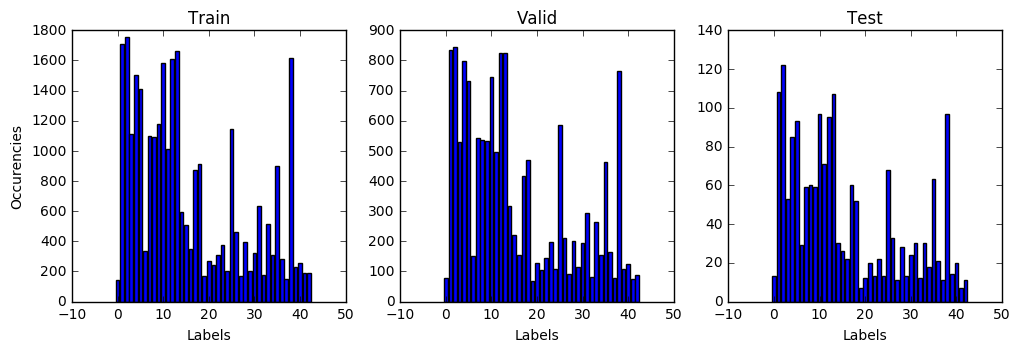

In [10]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.bar(range(len(train_stat)), train_stat.values(), align='center')
#plt.xticks(range(len(train_stat)),train_stat.keys())
plt.title('Train')
plt.xlabel('Labels')
plt.ylabel('Occurencies')

plt.subplot(132)
plt.bar(range(len(valid_stat)), valid_stat.values(), align='center')
#plt.xticks(range(len(valid_stat)),valid_stat.keys())
plt.title('Valid')
plt.xlabel('Labels')

plt.subplot(133)
plt.bar(range(len(test_stat)), test_stat.values(), align='center')
#plt.xticks(range(len(test_stat)),test_stat.keys())
plt.title('Test')
plt.xlabel('Labels')

plt.show()

In [11]:
def min_max_normalization(images):
    new_images = []
    for image in images:
        image_min = np.min(image)
        image_max = np.max(image)
        new_images.append(255.0*(image-image_min)/(image_max - image_min))
    return new_images
X_train_n = min_max_normalization(X_train)
X_valid_n = min_max_normalization(X_valid)
X_test_n = min_max_normalization(X_test)

In [12]:
import tensorflow as tf
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_n)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_n, y_train = shuffle(X_train_n, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_n[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_n, y_valid)

        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.523

EPOCH 2 ...
Validation Accuracy = 0.729

EPOCH 3 ...
Validation Accuracy = 0.819

EPOCH 4 ...
Validation Accuracy = 0.864

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.921

EPOCH 9 ...
Validation Accuracy = 0.929

EPOCH 10 ...
Validation Accuracy = 0.933

EPOCH 11 ...
Validation Accuracy = 0.938

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.941

EPOCH 15 ...
Validation Accuracy = 0.945

EPOCH 16 ...
Validation Accuracy = 0.948

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.952

EPOCH 20 ...
Validation Accuracy = 0.952

EPOCH 21 ...
Validation Accuracy = 0.956

EPOCH 22 ...
Validation Accuracy = 0.951

EPOCH 23 ...
Validation Accuracy = 0.950

EPOCH 24 ...
Validation Accura

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. Plot one image, make sure it looks reasonable.
1. Shuffle and split the data set into training, validation and test sets.
1. Show distribution of labels in three datasets, make sure the distribution are similar, meaning that shuffling is random.
1. The raw images are preprocessed with min_max_normalization which set the darkest value on rgb channel to 255. Doing so would normalize the initial image and mitigate the system bias on each image. Grayscaling is not used because color contains some information, some of the classes contains more red color while other classes contains more blue region.
1. One-hot encoding the output, as it will be used in the LeNet.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The training, validation and test datasets are randomly shuffled with size of 30150, 14850, and 6,839 respectively, training and validation set are splitted with train_test_split function.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The DNN in this project is the classic LeNet with input size of (32,32,3) for each image, the output labels are 43 in total, which corresponds to the 43 classes of the German Traffic Sign Dataset.

The Lenet model contains two convolutional layer (specifically, conv-relu-max_pooling layers), two fully connected layer (fully connected - relu layers) and one last fully connected layer. The convolutional layer extract the  characters of image while fully connected layer tries to mitigate the non-linear features outside the convolutional layer. Relu works as the most simplified non-linear activation function while max_pooling tries to combine information from previous convolution as well as shrink the size of parameters. 

The detailed size parameters are defined in the LeNet implementation. Notice that input size is 32 by 32 by 3 because all three rgb channels are used in this network.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The epochs and batch size are initially choosen to be 100 and 256. Hyperparameters of mu and sigma are chosen to be 0 and 0.1, which are the same for the MNIST dataset training.

The batch size is set to 256. I start with 128 and I noticed some validation accuracy fluctuation. I believe this is caused by smaller batch size with noisier training signal. Higher batch size is better, but longer it will take to compute the gradient for each step. 256 is a good trade-off point for this task. 

The epochs parameter is set to 50 for it gives almost the best validation accuracy. Usually neural networks works better with longer training time i.e. epochs, but the training error will saturate eventually. I've tested running the neural network model with 100 epoch, but validation accuracy is almost saturated at 50 epochs. I think it is a good trade-off between training time and accuracy for this project.

I used the AdamOptimizer with learning rate 1e-3, which is suitable for this task. AdamOptimizer works better in reaching the saturation point as well as avoid overfitting. Learning rate is fixed for this project, it would be better if attentuated a little so that it could saturate faster.

Hyperparameters are selected from the previous MNIST tutorial. mu and sigma are used to initialized the weight and biase. They are good as long as the output are not die out (meaning all go to zero) nor diverge.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


I started the model building process I used a well-known LeNet architecture. The main reasons for selecting that model was
1. Well-known model and perform well on computer vision tasks.
1. Easy to train even on a decent laptop.

I think this is suitable for the current problem because the validation accuracy is as high as over 97% in general. In comparing with literature, it is a pretty decent accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
import matplotlib.image as mpimg
import numpy as np
images = np.zeros((5,32,32,3),dtype='uint8')
image = mpimg.imread('test_images/resize/1.jpg')
images[0] = image
image = mpimg.imread('test_images/resize/2.jpg')
images[1] = image
image = mpimg.imread('test_images/resize/3.jpg')
images[2] = image
image = mpimg.imread('test_images/resize/4.jpg')
images[3] = image
image = mpimg.imread('test_images/resize/5.jpg')
images[4] = image

In [19]:
images_n = min_max_normalization(images)

In [20]:
predicted_classes = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #predicted_classes = sess.run(tf.argmax(LeNet(x), 1), feed_dict={x: X_test})
    predicted_classes = sess.run(tf.argmax(logits, 1), feed_dict={x: images_n})

In [21]:
predicted_classes

array([13, 31,  2, 12, 15])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



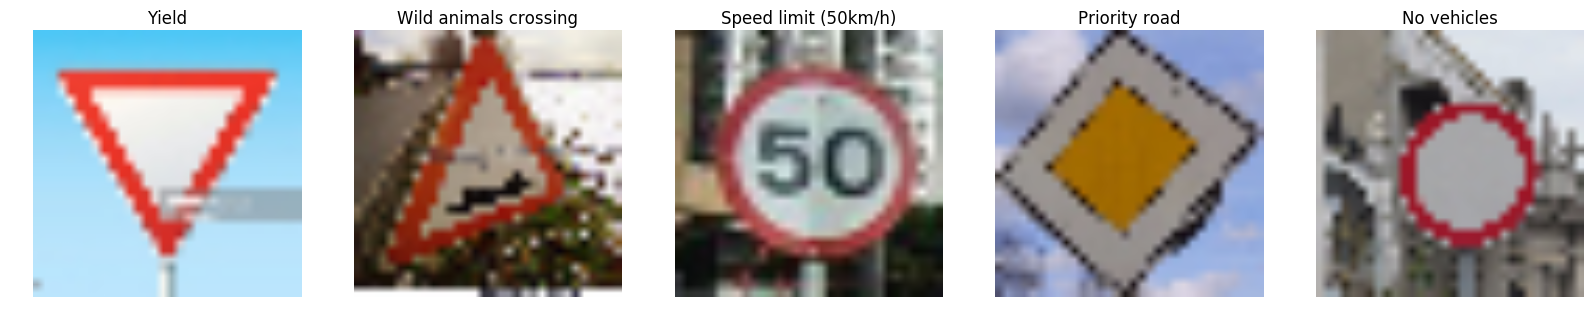

In [22]:
import pandas as pd
signnames = pd.read_csv("signnames.csv");

plt.rcParams['figure.figsize'] = (20.0, 20.0)
f, ax = plt.subplots(nrows=1, ncols=5)

for i, item in enumerate(predicted_classes):
    fullname = str(signnames.iloc[predicted_classes[i]].SignName)
    ax[i].axis('off')
    ax[i].set_title(fullname, loc='center')
    ax[i].imshow(images[i])

**Answer:**

I plot the 5 images with predictions as the image title. We can tell if the image is tilted, it is difficult to classify (e.g. second image should be bumpy road, but it fails to identify)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The images I got online and resized to 32 by 32. The correct images should be "Yield", "Bumpy road", " Speed limit (50km/h)", "Priority road", "No vehicles". The model performs well on captured pictures. 4 of them are correctly identified, the accuracy is 80%.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
predicted_classes = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #predicted_classes = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test})
    #add softmax layer to predict the possibility.
    TopKV2 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: images_n})

In [24]:
print(TopKV2.indices.shape)

(5, 5)


For image 1:
'Yield' with possibility 1.0
'Speed limit (20km/h)' with possibility 0.0
'Speed limit (30km/h)' with possibility 0.0
'Speed limit (50km/h)' with possibility 0.0
'Speed limit (60km/h)' with possibility 0.0
For image 2:
'Wild animals crossing' with possibility 0.995028
'Speed limit (30km/h)' with possibility 0.00497114
'Slippery road' with possibility 4.52331e-07
'Traffic signals' with possibility 1.79888e-09
'No entry' with possibility 3.50808e-13
For image 3:
'Speed limit (50km/h)' with possibility 1.0
'No passing' with possibility 1.18479e-13
'End of no passing by vehicles over 3.5 metric tons' with possibility 1.9055e-17
'Speed limit (80km/h)' with possibility 4.77848e-20
'Speed limit (30km/h)' with possibility 3.78065e-21
For image 4:
'Priority road' with possibility 1.0
'End of no passing by vehicles over 3.5 metric tons' with possibility 8.04179e-31
'Right-of-way at the next intersection' with possibility 1.08451e-35
'End of all speed and passing limits' with possibil

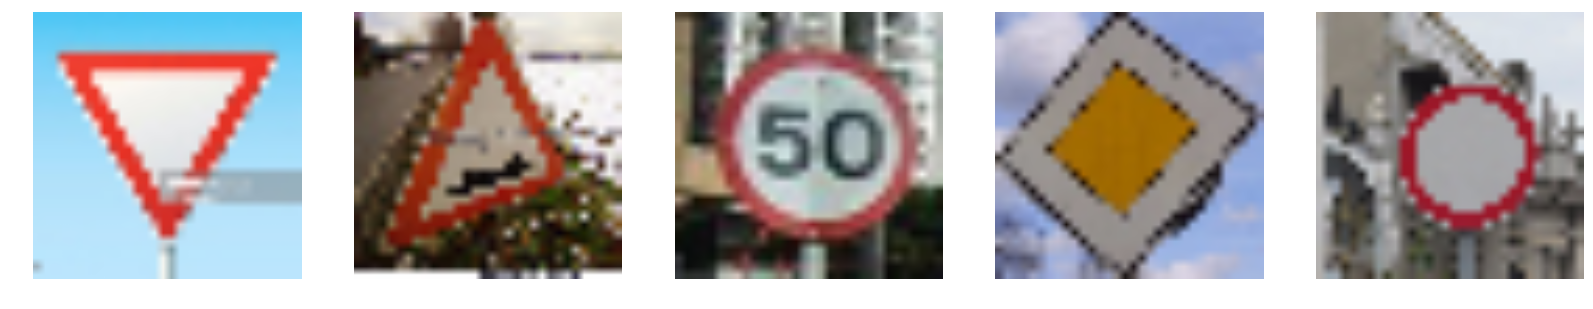

In [25]:
plt.rcParams['figure.figsize'] = (20.0, 20.0)
f, ax = plt.subplots(nrows=1, ncols=5)

for i in range(5):
    print("For image " + str(i+1) +":")
    for j in range(5):
        print("'" + str(signnames.iloc[TopKV2.indices[i][j]].SignName) + "' with possibility " + str(TopKV2.values[i][j]))
        ax[i].axis('off')
        ax[i].imshow(images[i])

**Answer:**

Even with top five predictions, the classifier fails to identify the second image in the five options, which is tilted. With this, we can assume that our classifier won't be very good job with tilted image.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.